# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\AlonDS.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(62, 2001)


,Target,genes.1,genes.2,genes.3,genes.4,genes.5,genes.6,genes.7,genes.8,genes.9,...,genes.1991,genes.1992,genes.1993,genes.1994,genes.1995,genes.1996,genes.1997,genes.1998,genes.1999,genes.2000
0,colonc,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,healthy,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,colonc,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,healthy,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,colonc,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250


In [4]:
target = 'Target'

In [5]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols

Index(['genes.1', 'genes.2', 'genes.3', 'genes.4', 'genes.5', 'genes.6',
       'genes.7', 'genes.8', 'genes.9', 'genes.10',
       ...
       'genes.1991', 'genes.1992', 'genes.1993', 'genes.1994', 'genes.1995',
       'genes.1996', 'genes.1997', 'genes.1998', 'genes.1999', 'genes.2000'],
      dtype='object', length=2000)

<AxesSubplot:>

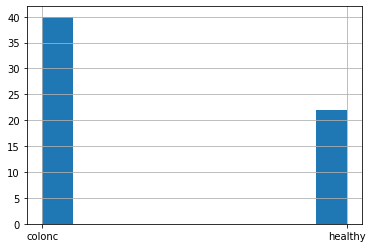

In [6]:
df[target].hist()

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[[target]].head(1)

,Target
0,0


# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [8]:
from PyImpetus import PPIMBC
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.90. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


# Define the dataset and target here

In [9]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

2000

In [10]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(62, 2000) (62,)


In [11]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,
                                                    stratify=y)
print(X_train.shape, X_test.shape)

(49, 2000) (13, 2000)


In [12]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = X.select_dtypes(['category']).columns
obj_columns = X.select_dtypes(['object']).columns
len(cat_columns), len(obj_columns)

(0, 0)

In [13]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

In [14]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [15]:
X_train.head()

,genes.1,genes.2,genes.3,genes.4,genes.5,genes.6,genes.7,genes.8,genes.9,genes.10,...,genes.1991,genes.1992,genes.1993,genes.1994,genes.1995,genes.1996,genes.1997,genes.1998,genes.1999,genes.2000
59,38.461248,24.580806,19.481071,18.148537,7.140435,33.088907,31.191269,1.000000,28.629731,20.815147,...,31.066283,27.104186,12.668126,49.618433,27.860494,17.095311,23.435732,33.826554,46.137849,1.578074
45,97.871352,26.611501,30.133794,55.264389,57.441237,38.148797,45.512949,94.468667,56.095581,26.009252,...,29.815105,42.183444,79.907493,45.807253,59.806988,42.739017,71.286387,85.267936,48.179900,88.134550
38,14.551118,42.766046,41.582107,3.141627,12.628490,38.081467,20.859169,21.950321,6.348879,25.751555,...,19.584336,20.474692,29.829628,39.701278,9.805398,16.528287,2.269941,3.607471,9.018831,20.794642
26,31.390458,27.698245,32.097173,16.697620,6.474276,30.968476,30.063060,6.544592,35.513190,18.801392,...,14.763998,32.485445,27.988796,24.302008,22.607343,7.113793,17.978266,22.237725,6.739468,12.757255
2,15.865086,64.076064,59.751354,42.953187,1.000000,5.731889,1.914354,10.024005,26.264994,16.826644,...,15.976452,18.577158,3.779880,57.830268,16.325399,31.494331,7.277572,10.463772,6.302347,7.945127


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [16]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(49, 2001)


In [17]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(13, 2001)


In [18]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (49, 2001)
    Caution: We will try to reduce the memory usage of dataframe from 0.75 MB
    Memory usage after optimization is: 0.19 MB
        decreased by 75.0%
     Loaded. Shape = (49, 2001)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2000 Predictors classified...
        No variables removed since no ID or low-information

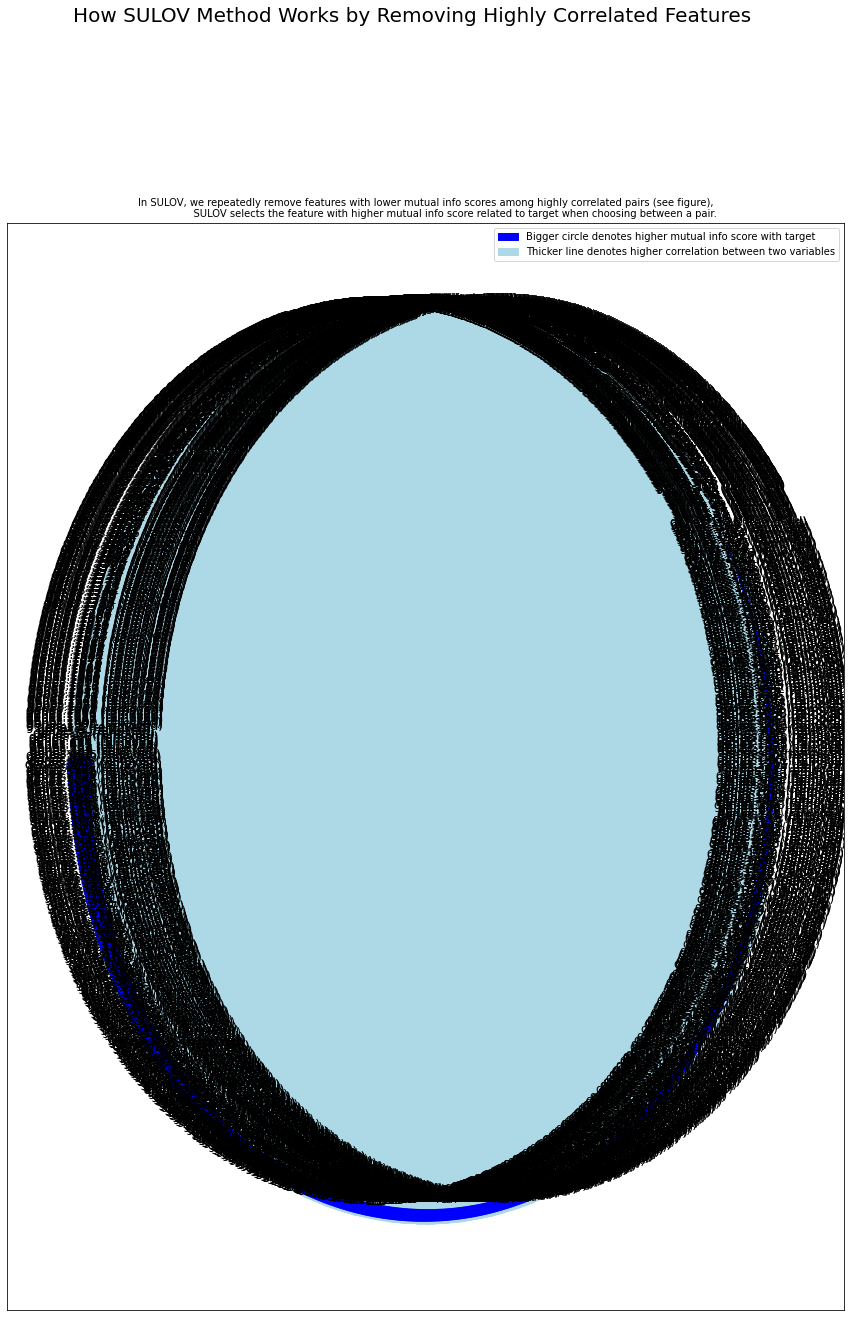

Time taken for SULOV method = 60 seconds
    Adding 0 categorical variables to reduced numeric variables  of 193
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 193 
XGBoost version: 1.5.1
Number of booster rounds = 100
        using 193 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 154 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 115 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 76 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 37 variables...
            Time taken for regular XGBoost feature selection = 1 seconds


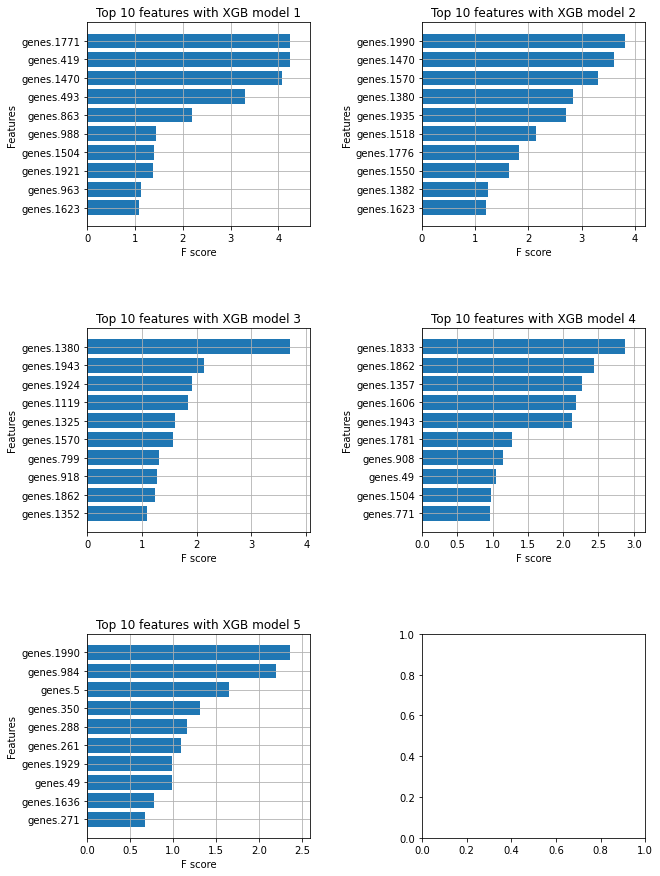

            Total time taken for XGBoost feature selection = 2 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 108 important features. Too many to print...
    Time taken = 63 seconds
Returning list of 108 important features and dataframe.
    Time taken to create entire pipeline = 67 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498


In [19]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [20]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 13 features after 5 feature selection runs
[featsel] 13 features after correlation filtering
[featsel] 10 features after noise filtering


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498
1,Autofeat,1.643496e+09,1.643496e+09,24.054369


In [21]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  2000
Number of variables after selection:  502


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498
1,Autofeat,1.643496e+09,1.643496e+09,24.054369
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  2

Feature importance:  [7.4108946567616805, 7.241537959434772, 5.881552029618836, 5.61362986493827, 5.61362986493827, 5.483634127146055, 5.356406999971197, 5.109414274682476, 4.989615621696446, 4.872252901282677, 4.757075260819435, 4.757075260819435, 4.318419333119523, 4.318419333119523, 4.318419333119523, 4.213961286420002, 4.213961286420002, 4.213961286420002, 4.010907260253857, 4.010907260253857, 3.815485593252747, 3.815485593252747, 3.815485593252747, 3.720557275404062, 3.720557275404062, 3.627422228640497, 3.446363007454386, 3.446363007454386, 3.3584241670106385, 3.3584241670106385, 3.3584241670106385, 3.272125763424398, 3.272125763424398, 3.187497697678543, 3.1044876919713547, 3.023029421702323, 3.023029421702323]


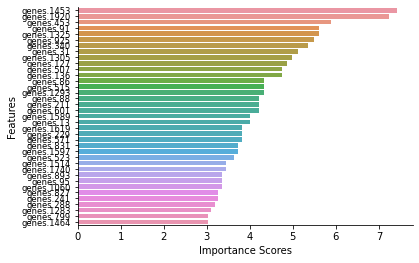

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498
1,Autofeat,1.643496e+09,1.643496e+09,24.054369
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201
3,PyImpetus,1.643497e+09,1.643497e+09,419.552023


In [22]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [23]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498
1,Autofeat,1.643496e+09,1.643496e+09,24.054369
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201
3,PyImpetus,1.643497e+09,1.643497e+09,419.552023


In [24]:
#############################################EvolutionaryFS#############################################
##get train and test data
data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LogisticRegression(n_jobs=-1,random_state=1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 0.7692307692307693 =================
================= Best performance for generation 1 : 0.8461538461538461 =================
================= Best performance for generation 2 : 0.8461538461538461 =================
================= Best performance for generation 3 : 0.8461538461538461 =================
================= Best performance for generation 4 : 0.9230769230769231 =================
================= Best performance for generation 5 : 0.9230769230769231 =================
================= Best performance for generation 6 : 0.8461538461538461 =================
================= Best performance for generation 7 : 0.8461538461538461 =================
================= Best performance for generation 8 : 0.9230769230769231 =================
================= Best performance for generation 9 : 0.9230769230769231 =================
================= Best performance for generation 10 : 0.9230769230769231 ================

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498
1,Autofeat,1.643496e+09,1.643496e+09,24.054369
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201
3,PyImpetus,1.643497e+09,1.643497e+09,419.552023
4,EvolutionaryFS,1.643497e+09,1.643497e+09,127.199101


In [25]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=log_loss(y_test,model.predict_proba(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.04500963094237236 					 0.04500963094237236 
Iteration 1 	 0.043664592107401534 					 0.043664592107401534 
Iteration 2 	 0.0428495450500782 					 0.0428495450500782 
Iteration 3 	 0.04437874861912959 					 0.0428495450500782 
Iteration 4 	 0.04202502499225172 					 0.04202502499225172 
Iteration 5 	 0.041742312910488126 					 0.041742312910488126 
Iteration 6 	 0.042240495488698314 					 0.041742312910488126 
Iteration 7 	 0.041274186634421006 					 0.041274186634421006 
Iteration 8 	 0.042222750232668776 					 0.041274186634421006 
Iteration 9 	 0.041774019757046 					 0.041274186634421006 
Iteration 10 	 0.042390790436588284 					 0.041274186634421006 
Iteration 11 	 0.04121395201088942 					 0.04121395201088942 
Iteration 12 	 0.04138363634100708 					 0.04121395201088942 
Iteration 13 	 0.04135697490975778 					 0.04121395201088942 
Iteration 14 	 0.04144928870256922 					 0.0412139

In [26]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="balanced_accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.5    	0          	0.5        	0.5        
1  	60    	0.5    	0          	0.5        	0.5        
2  	60    	0.5    	0          	0.5        	0.5        
3  	60    	0.5    	0          	0.5        	0.5        
4  	60    	0.5    	0          	0.5        	0.5        
5  	60    	0.5    	0          	0.5        	0.5        
6  	60    	0.5    	0          	0.5        	0.5        
7  	60    	0.5    	0          	0.5        	0.5        
8  	60    	0.5    	0          	0.5        	0.5        
9  	60    	0.5    	0          	0.5        	0.5        
10 	60    	0.5    	0          	0.5        	0.5        
11 	60    	0.5    	0          	0.5        	0.5        
12 	60    	0.5    	0          	0.5        	0.5        
13 	60    	0.5    	0          	0.5        	0.5        
14 	60    	0.5    	0          	0.5        	0.5        
15 	60    	0.5    	0          	0.5        	0.5        
16 	60    	0.5    	0          	0.5        	0.5        
17 	60    

In [27]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	1976
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	20
Rejected: 	1976
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	20
Rejected: 	1976
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	20
Rejected: 	1976
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	16
Rejected: 	1978
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	16
Rejected: 	1978
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	16
Rejected: 	1978
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	16
Rejected: 	1978
Iteration: 	16 / 100
Confi

In [28]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

6 attributes confirmed important: ['genes.1671', 'genes.1771', 'genes.1772', 'genes.249', 'genes.765', 'genes.1935']
1994 attributes confirmed unimportant: ['genes.220', 'genes.853', 'genes.198', 'genes.1782', 'genes.1734', 'genes.1797', 'genes.1623', 'genes.1951', 'genes.335', 'genes.315', 'genes.1753', 'genes.628', 'genes.582', 'genes.1228', 'genes.424', 'genes.813', 'genes.1265', 'genes.1266', 'genes.1415', 'genes.1719', 'genes.1317', 'genes.1393', 'genes.155', 'genes.1334', 'genes.1125', 'genes.1585', 'genes.528', 'genes.324', 'genes.1947', 'genes.111', 'genes.587', 'genes.97', 'genes.457', 'genes.1912', 'genes.211', 'genes.286', 'genes.1254', 'genes.1860', 'genes.1620', 'genes.540', 'genes.379', 'genes.317', 'genes.364', 'genes.1955', 'genes.1687', 'genes.352', 'genes.15', 'genes.991', 'genes.936', 'genes.1372', 'genes.713', 'genes.311', 'genes.1991', 'genes.1136', 'genes.1795', 'genes.578', 'genes.788', 'genes.1311', 'genes.793', 'genes.117', 'genes.620', 'genes.475', 'genes.1942

In [29]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [30]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [31]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

,genes.1,genes.2,genes.3,genes.4,genes.5,genes.6,genes.7,genes.8,genes.9,genes.10,...,genes.1991,genes.1992,genes.1993,genes.1994,genes.1995,genes.1996,genes.1997,genes.1998,genes.1999,genes.2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250


In [32]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [33]:
model1 = RandomForestClassifier(n_estimators=300, random_state=99)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='balanced_accuracy', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[0.7375 0.8    0.875  0.75   0.625 ]
Mean Score for all features = 0.7575000000000001


##  Here we run Cross Validation and get accuracy metrics for each technique

In [34]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit.head()

[0.58333333 0.625      0.83333333 1.         0.66666667]
Mean Score for FeatureWiz = 0.7416666666666666
[0.79166667 0.875      0.76190476 1.         1.        ]
Mean Score for Autofeat = 0.8857142857142858
[0.70833333 0.75       0.69047619 0.66666667 0.66666667]
Mean Score for FeatureEngine = 0.6964285714285714
[0.79166667 0.625      0.76190476 0.69047619 0.66666667]
Mean Score for PyImpetus = 0.7071428571428572
[0.58333333 0.625      0.85714286 0.52380952 0.66666667]
Mean Score for EvolutionaryFS = 0.6511904761904762
[0.70833333 0.625      0.69047619 0.76190476 0.66666667]
Mean Score for Zoof = 0.6904761904761905
[0.70833333 0.625      0.69047619 0.69047619 0.66666667]
Mean Score for Genetic OPT = 0.6761904761904762
[0.79166667 0.875      0.52380952 1.         0.66666667]
Mean Score for BorutaPy = 0.7714285714285715
[0.66666667 0.875      0.69047619 0.92857143 0.83333333]
Mean Score for BorutaShap = 0.7988095238095237


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498,0.741667
1,Autofeat,1.643496e+09,1.643496e+09,24.054369,0.885714
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201,0.696429
3,PyImpetus,1.643497e+09,1.643497e+09,419.552023,0.707143
4,EvolutionaryFS,1.643497e+09,1.643497e+09,127.199101,0.651190


## You must finally train a model on X_train and test it on X_test using selected features

In [35]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = balanced_accuracy_score(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50         5

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50         5

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.80      0.89         5

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13

              preci

In [36]:
time_to_fit['Dataset'] = "AlonDS"
time_to_fit['Type'] = "Classification"
time_to_fit['Metric'] = "balanced accuracy"
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.643496e+09,1.643496e+09,67.314498,0.741667,0.6375,AlonDS,Classification,balanced accuracy
1,Autofeat,1.643496e+09,1.643496e+09,24.054369,0.885714,0.6375,AlonDS,Classification,balanced accuracy
2,FeatureEngine,1.643496e+09,1.643497e+09,188.838201,0.696429,0.9000,AlonDS,Classification,balanced accuracy
3,PyImpetus,1.643497e+09,1.643497e+09,419.552023,0.707143,0.7375,AlonDS,Classification,balanced accuracy
4,EvolutionaryFS,1.643497e+09,1.643497e+09,127.199101,0.651190,0.5750,AlonDS,Classification,balanced accuracy
5,Zoof,1.643497e+09,1.643497e+09,127.199101,0.690476,0.8000,AlonDS,Classification,balanced accuracy
6,Genetic OPT,1.643497e+09,1.643497e+09,25.759974,0.676190,0.7375,AlonDS,Classification,balanced accuracy
7,BorutaPy,1.643497e+09,1.643497e+09,49.257438,0.771429,0.9000,AlonDS,Classification,balanced accuracy
8,BorutaShap,1.643497e+09,1.643497e+09,69.852495,0.798810,0.7375,AlonDS,Classification,balanced accuracy


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus